<a href="https://colab.research.google.com/github/shluh/ECD01_SupervisedMachineLearning/blob/main/EP03_Regulariza%C3%A7%C3%A3o%2C_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularização e Dropout

### CIFAR-10 dataset
* Link: https://www.cs.toronto.edu/~kriz/cifar.html
* Tipo: Classificação de imagens
* Número de instâncias: 60.000 imagens coloridas de 32x32 pixels distribuídas em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.



In [3]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Load the CIFAR-10 dataset
(x_train, labels_train), (x_test, labels_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# show the dimension
print(f'Train: X={x_train.shape}')
print(f'Test: X={x_test.shape}')

# show label shape
print(f'Train: label={labels_train.shape}')
print(f'Test: label={labels_test.shape}')

# faz 'one-hot' encoding do rotulo
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

# show y shape
print(f'Train: y={y_train.shape}')
print(f'Test: y={y_test.shape}')

Train: X=(50000, 32, 32, 3)
Test: X=(10000, 32, 32, 3)
Train: label=(50000, 1)
Test: label=(10000, 1)
Train: y=(50000, 10)
Test: y=(10000, 10)


In [4]:
y_train.shape

(50000, 10)

### CNN

A CNN abaixo está com overfitting, execute para verificar

In [5]:
# seu codigo aqui
from keras.layers import Conv2D, MaxPooling2D

# Create the model
cnn = Sequential([
    Conv2D(32, (7,7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2), strides=2, ),
    Conv2D(32, (5,5), activation='relu', ),
    MaxPooling2D((2,2), strides=2,),
    Conv2D(32, (3,3), activation='relu', ),
    MaxPooling2D((2,2), strides=2,),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
])


cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_cnn = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1407/1407 [==============================] - 15s 6ms/step - loss: 1.8047 - accuracy: 0.3317 - val_loss: 1.5842 - val_accuracy: 0.4112
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5494 - accuracy: 0.4306 - val_loss: 1.4365 - val_accuracy: 0.4762
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4458 - accuracy: 0.4705 - val_loss: 1.3999 - val_accuracy: 0.4966
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3916 - accuracy: 0.4960 - val_loss: 1.3474 - val_accuracy: 0.5210
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3363 - accuracy: 0.5154 - val_loss: 1.3063 - val_accuracy: 0.5326
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2920 - accuracy: 0.5350 - val_loss: 1.3475 - val_accuracy: 0.5258
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2483 - accuracy: 0.5525 - val_loss: 1.2841 - val_accuracy

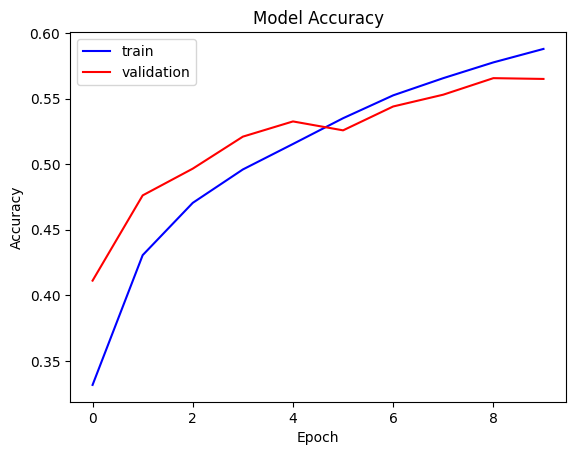

313/313 [==============================] - 1s 3ms/step - loss: 1.3044 - accuracy: 0.5427


[1.304359793663025, 0.5426999926567078]

In [6]:
# Plot train and validation accuracy
plt.plot(history_cnn.history['accuracy'], color='b', label='train')
plt.plot(history_cnn.history['val_accuracy'], color='r', label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# show the test accuracy
cnn.evaluate(x_test, y_test)

#### Ex1: Adicione regularização L2 em cada camada do MLP. Use lambda = 0.02

**Qual é o efeito na acurácia de treino, validação e teste?**

R: Adicionar regularizacao L2 na camanda MLP nao ajudou a melhoras a metrica de acuracia do treino, teste e valicao. No entanto é interessante verificar que a acuracia da validacao esteve mais proxima da acuracia do treino, o superando nas épocas finais (a partir da época 8)

In [7]:
# seu codigo aqui
from tensorflow.keras import regularizers

# Create the model
cnn = Sequential([
    Conv2D(32, (7,7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2), strides=2, ),
    Conv2D(32, (5,5), activation='relu', ),
    MaxPooling2D((2,2), strides=2,),
    Conv2D(32, (3,3), activation='relu', ),
    MaxPooling2D((2,2), strides=2,),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.02))                                   # 1 camada de saida com 10 neuronios
])


cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_cnn = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 9s 5ms/step - loss: 2.0414 - accuracy: 0.2688 - val_loss: 1.9168 - val_accuracy: 0.3164
Epoch 2/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.7597 - accuracy: 0.3704 - val_loss: 1.6676 - val_accuracy: 0.4066
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6261 - accuracy: 0.4243 - val_loss: 1.5611 - val_accuracy: 0.4510
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5581 - accuracy: 0.4483 - val_loss: 1.5427 - val_accuracy: 0.4512
Epoch 5/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5066 - accuracy: 0.4698 - val_loss: 1.4806 - val_accuracy: 0.4698
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4645 - accuracy: 0.4834 - val_loss: 1.4378 - val_accuracy: 0.4988
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4297 - accuracy: 0.4975 - val_loss: 1.4416 - val_accuracy:

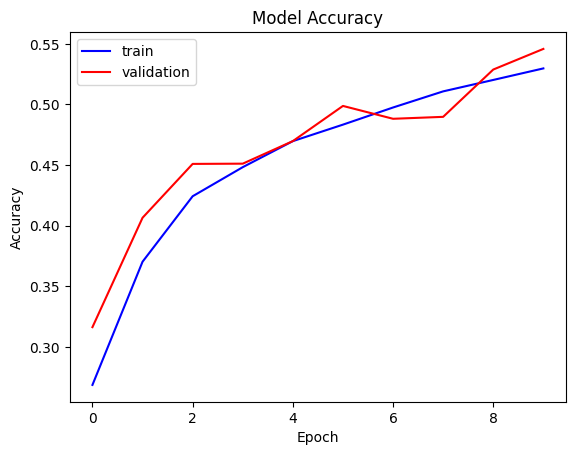

313/313 [==============================] - 1s 3ms/step - loss: 1.3710 - accuracy: 0.5223


[1.3709936141967773, 0.5223000049591064]

In [8]:
# Plot train and validation accuracy
plt.plot(history_cnn.history['accuracy'], color='b', label='train')
plt.plot(history_cnn.history['val_accuracy'], color='r', label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# show the test accuracy
cnn.evaluate(x_test, y_test)

#### Ex2: Adicione regularização L2 em cada camada do MLP e das convoluções. Use lambda = 0.02

**Qual é o efeito na acurácia de treino, validação e teste?**

R: A acuracia do teste diminiu bastante comparado com os modelos e parametros anteriores, e a acuracia do treino e principalmente a da validacao tiveram bastante oscilacao.

In [11]:
# seu codigo aqui
from tensorflow.keras import regularizers

# Create the model
cnn = Sequential([
    Conv2D(32, (7,7), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.02)),
    MaxPooling2D((2,2), strides=2, ),
    Conv2D(32, (5,5), activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    MaxPooling2D((2,2), strides=2,),
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02) ),
    MaxPooling2D((2,2), strides=2,),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.02))
])


cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_cnn = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 11s 7ms/step - loss: 2.2701 - accuracy: 0.1833 - val_loss: 2.2118 - val_accuracy: 0.1794
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1380 - accuracy: 0.1906 - val_loss: 2.1437 - val_accuracy: 0.1972
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 2.1164 - accuracy: 0.1894 - val_loss: 2.1044 - val_accuracy: 0.1826
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1068 - accuracy: 0.1911 - val_loss: 2.0761 - val_accuracy: 0.2040
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1015 - accuracy: 0.1926 - val_loss: 2.0916 - val_accuracy: 0.2016
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0977 - accuracy: 0.1911 - val_loss: 2.0757 - val_accuracy: 0.2128
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0945 - accuracy: 0.1933 - val_loss: 2.0738 - val_accuracy

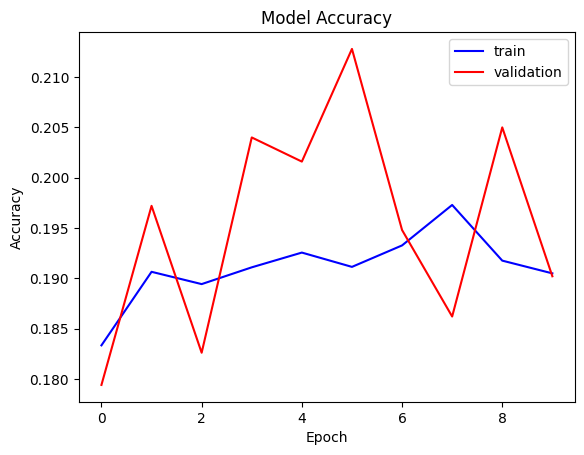

313/313 [==============================] - 1s 3ms/step - loss: 2.0760 - accuracy: 0.1904


[2.0760245323181152, 0.19040000438690186]

In [12]:
# Plot train and validation accuracy
plt.plot(history_cnn.history['accuracy'], color='b', label='train')
plt.plot(history_cnn.history['val_accuracy'], color='r', label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# show the test accuracy
cnn.evaluate(x_test, y_test)

#### EX3: Adicione dropout (taxa=0.2) após cada camada da rede (não use regularização aqui)

**Qual é o efeito na acurácia de treino, validação e teste?**

R: Utilizar o dropout nas camadas e nao fazer regularizacao, retorna um modelo com saídas semelhantes ao do Ex01, onde foi feita regularização L2 nas camadas do MLP, com lambda = 0.02. No entanto com acuracia de treino um pouco menor e a de validacao sem fortes oscilacoes.

In [13]:
# seu codigo aqui
from tensorflow.keras import regularizers
from keras.layers import Dropout

# Create the model
cnn = Sequential([
    Conv2D(32, (7,7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2), strides=2, ),
    Dropout(0.2),
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D((2,2), strides=2,),
    Dropout(0.2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2), strides=2,),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_cnn = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 10s 5ms/step - loss: 1.8738 - accuracy: 0.2947 - val_loss: 1.6318 - val_accuracy: 0.3806
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6258 - accuracy: 0.4015 - val_loss: 1.5214 - val_accuracy: 0.4452
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5620 - accuracy: 0.4280 - val_loss: 1.4485 - val_accuracy: 0.4674
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5212 - accuracy: 0.4460 - val_loss: 1.4524 - val_accuracy: 0.4830
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4913 - accuracy: 0.4574 - val_loss: 1.3791 - val_accuracy: 0.5010
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4613 - accuracy: 0.4690 - val_loss: 1.3663 - val_accuracy: 0.5048
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4457 - accuracy: 0.4790 - val_loss: 1.3830 - val_accuracy

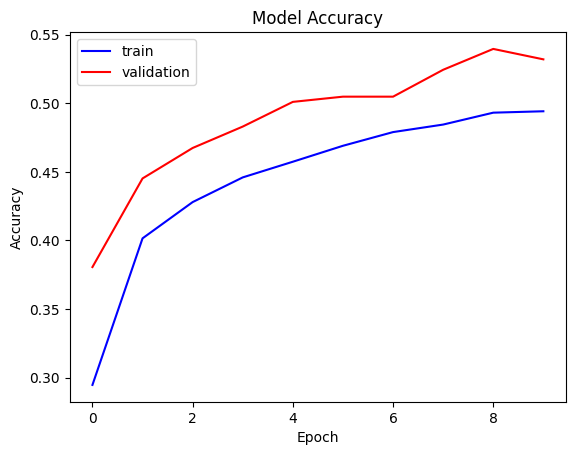

313/313 [==============================] - 1s 3ms/step - loss: 1.3365 - accuracy: 0.5248


[1.336524486541748, 0.5248000025749207]

In [14]:
# Plot train and validation accuracy
plt.plot(history_cnn.history['accuracy'], color='b', label='train')
plt.plot(history_cnn.history['val_accuracy'], color='r', label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# show the test accuracy
cnn.evaluate(x_test, y_test)

#### EX4: Adicione regularização L2 em cada camada do MLP e dropout (taxa=0.2) após cada camada da rede. Use lambda = 0.02

**Qual é o efeito na acurácia de treino, validação e teste?**

R: Com estes parametros, de regularizacao e dropout, houve ligeira melhora nas acuracias do treino, teste e validacao. No entanto nao parece nao divergir muito da saída verificada nos modelos anteriores (com excecao do Ex2 que foi o pior). Ainda que, com estes parametros, as acuracias tenham ao menos estabilizado, todas estao de modo geral, baixas.

In [15]:
# seu codigo aqui
from tensorflow.keras import regularizers
from keras.layers import Dropout

# Create the model
cnn = Sequential([
    Conv2D(32, (7,7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2), strides=2, ),
    Dropout(0.2),
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D((2,2), strides=2,),
    Dropout(0.2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2), strides=2,),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    Dropout(0.2),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.02))
])



cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_cnn = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 10s 6ms/step - loss: 2.0620 - accuracy: 0.2518 - val_loss: 1.7617 - val_accuracy: 0.3530
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7842 - accuracy: 0.3573 - val_loss: 1.6717 - val_accuracy: 0.3994
Epoch 3/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.7044 - accuracy: 0.3866 - val_loss: 1.5817 - val_accuracy: 0.4300
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6571 - accuracy: 0.4070 - val_loss: 1.5719 - val_accuracy: 0.4436
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6102 - accuracy: 0.4273 - val_loss: 1.4987 - val_accuracy: 0.4744
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5790 - accuracy: 0.4379 - val_loss: 1.4634 - val_accuracy: 0.4860
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5526 - accuracy: 0.4541 - val_loss: 1.4194 - val_accuracy

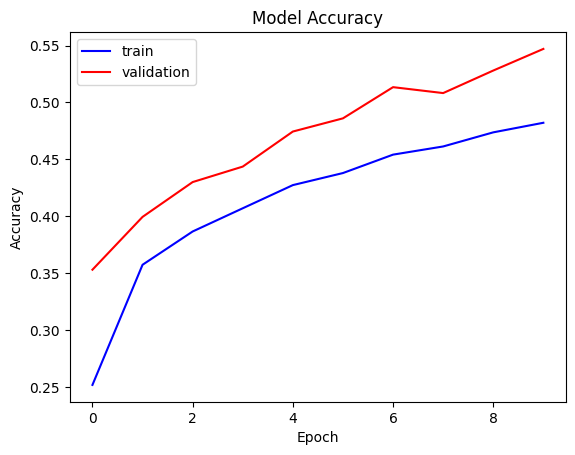

313/313 [==============================] - 1s 3ms/step - loss: 1.3842 - accuracy: 0.5309


[1.3841758966445923, 0.5309000015258789]

In [17]:
# Plot train and validation accuracy
plt.plot(history_cnn.history['accuracy'], color='b', label='train')
plt.plot(history_cnn.history['val_accuracy'], color='r', label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# show the test accuracy
cnn.evaluate(x_test, y_test)

### Desafio (opcional)

Avalie outros valores para os hiperparametros e outras formas de regularização como BatchNorm e Camadas residuais (skip connections)